# Investing Games

[Inspiration](https://breakingthemarket.com/math-games/)

> "Understanding gambling games is one of the best training grounds for getting into the investment world."
    
                                                                                 Edward O. Thorp.-

<img src="ed.jpg" width="100">

([He](https://en.wikipedia.org/wiki/Edward_O._Thorp) pioneered the modern applications of probability theory, including the harnessing of very small correlations for reliable financial gain.)

## Game #1

Bet \\$100. Flip a coin, heads you win 50\% of the bet (receive \\$150 back, for a gain of \\$50), tails you lose 40% of your money (get \\$60 back, for a loss of \\$40).  Do you play this game?

### Análisis

Para caracterizarlo, se podría utilizar el valor esperado (sin necesidad de simular):

In [15]:
print(f'Aritmethic average: ${(150 + 60)/2}')

Aritmethic average: $105.0


En castellano: el promedio de las ganancias obtenidas en todas las oportunidades en las que pueda (tenga al menos $\$100$) y decida jugar a  este juego, será $\$105$.

Eso parece favorable pero, ¿es apropiado este modelo para describir la situación sobre la cuál hay que decidir?

Con énfasis epistemológico: ¿es la decisión independiente del contexto?

Ojalá. Sería muy afortunado encontrar un problema cuya solución no dependiera del contexto.

Esa es justamente la definición de **modelo**: una representación de una parte del TODO, artificialmente removida del resto.

Una abstracción.

Situaciones para imaginar:
* Soy infinillonario y puedo jugar sólo una vez.
* Tengo exactamente $\$100$ y puedo jugar sólo una vez.
* Claramente hay un montón de casos intermedios empezando con $W_0$ y pudiendo jugar $n$ veces.

## Game #2

Now let’s add a wrinkle to the game.  After the first round, the game repeats with the entire payout of the first round.  You get to play repeatedly as long as you desire, but each time you have to bet everything.    Example:

“You start the game with $\$100$, and win the first round.  You now have $\$150$.  You play again putting up $\$150$ and win the second round leaving you with $\$225$.  You play again with the $\$225$ and lose the third round, falling to $\$135$.  You decide to stop.”

Do you also play this game?  It is subtly different than the first game.  If you do play, when do you stop?

### Análisis

Dado que ahora el juego es más complejo porque involucra una cantidad de repeticiones dependiente de los resultados anteriores, que son aleatorios, voy a analizarlo simulando porque el cálculo formal me es difícil.

Además, tengo la complejidad adicional dada por no estar definida la condición de corte.

Voy a poner como condición arbitraria de corte, tener más de $\$200$ y no menos de $\$50$.

In [120]:
from itertools import accumulate
from operator import mul
from random import choice

def infinito(omega):
    while True:
        yield choice(omega)

def juego(w0=100, M=200, m=50):
    partidas = accumulate(infinito([0.6, 1.5]), mul, initial=w0)
    ws = []
    for k, w in enumerate(partidas):
        if w > M:
            ws.append((w, 'GANE'))
            break
        elif w < m:
            ws.append((w, 'PERDI'))
            break
        else:
            ws.append((w, 'SIGO'))
    return ws

print('Juego de ejemplo:\n\t' + '\n\t'.join(map(str, juego(M=200))))

Juego de ejemplo:
	(100, 'SIGO')
	(150.0, 'SIGO')
	(225.0, 'GANE')


¿Cuál será la probabilidad de ganar?

In [141]:
sum(juego()[-1][1] == 'GANE' for _ in range(10000))/10000 # ejecutar varias veces para palpar la varianza

0.4397

¿Cuál es la riqueza final esperada?

In [142]:
sum(juego()[-1][0] for _ in range(1000))/1000 # ejecutar varias veces para palpar la varianza

115.12040104803152

¿Serán útiles estas métricas?

¿Habrá alguna regla de decisión que haga que el juego sea favorable?

¿Qué pasa si soy más codicioso?

In [143]:
sum(juego(M=1000)[-1][1] == 'GANE' for _ in range(1000))/1000 # ejecutar varias veces para palpar la varianza

0.143

In [144]:
sum(juego(M=1000)[-1][0] for _ in range(10000))/10000 # ejecutar varias veces para palpar la varianza

184.5077032809514

¿Qué pasa si soy más conservador?

In [145]:
sum(juego(M=140, m=90)[-1][1] == 'GANE' for _ in range(10000))/10000

0.4958

In [178]:
sum(juego(M=140, m=90)[-1][0] for _ in range(10000))/10000

104.523

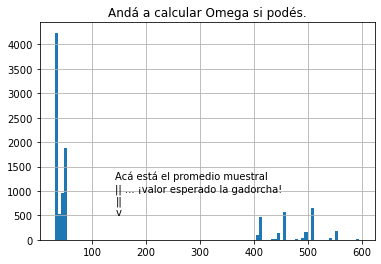

In [177]:
import matplotlib.pyplot as plt
js = [juego(M=400)[-1][0] for _ in range(10000)]
plt.hist(js, bins=100)
plt.grid(True)
plt.text(sum(js)/10000, 500, 'Acá está el promedio muestral\n|| ... ¡valor esperado la gadorcha!\n||\nv')
plt.title('Andá a calcular Omega si podés.')
plt.show()

## Game #3

This game is the same as the prior one, with the one difference being I decide when the game ends, not you.  You will bet $100, and the game will repeat with the payout of each round risked, until I decided to stop.  Do you play this game?

Think hard about what the differences of these games.

In [1]:
import numpy as np
from random import choice

In [2]:
reps = [1, 5, 10, 15, 20] 
for rep in reps: 
    experiments = 10000 
    results = [] 
    for experiment in range(experiments): 
        bet = 100 
        coins = [choice([1.5, 0.6]) for _ in range(rep)] 
        for coin in coins: 
            bet = bet * coin 
        results.append(bet) 
    print("Repetitions: {}. Return % (related to median): {:.4%}".format(rep, np.median(results)/100))

Repetitions: 1. Return % (related to median): 60.0000%
Repetitions: 5. Return % (related to median): 121.5000%
Repetitions: 10. Return % (related to median): 59.0490%
Repetitions: 15. Return % (related to median): 71.7445%
Repetitions: 20. Return % (related to median): 34.8678%


The correct answer, in my opinion, is to never play.  You will lose everything nearly every time.  Actually, if allowed to go on forever, the game will always trend toward total loss.  

Strange isn’t it.  A game works in your favor when played once, and against you when repeated?

epeated games of chance have very different odds of success than single games.  The odds of a series of bets – specifically a series of products (multiplication)- are driven by, and trend toward, the GEOMETRIC average.  Single bets, or a group of simultaneous bets -specifically a series of sums (addition)-, are driven by the ARITHMETIC average.   The arithmetic average for the game is \\$1.05, as seen in game #1. The geometric average of game #3 is \\$0.949 per game $(1.5 \times 0.6)^{1/2}$.  A loss of over 5 percent per play.

If you play a game once, you will expect returns in line with the arithmetic average.  The expectation of a single play is 5% profit.  However with every repetition, the expected return degrades towards the geometric average.  Below is a chart showing the expected compounded return of a game, depending on the number of games played. 

In [13]:
reps = [1, 5, 10, 15, 20] 
for rep in reps: 
    experiments = 10000 
    geometric = [] 
    arithmetic = []
    money = []
    for experiment in range(experiments): 
        coins = [choice([1.5, 0.6]) for _ in range(rep)] 
        geometric_average = np.product(coins)**(1/rep)
        arithmetic_average = np.mean(coins)
        geometric.append(geometric_average)
        arithmetic.append(arithmetic_average)
        bet = 100 # initial bet
        for coin in coins: 
            bet = bet * coin 
        return_ = (bet / 100)**(1/rep)
        money.append(return_)
    print("Repetitions: {} - Return: {:.3} - Arithmetic Average: {:.3} - Geometric Average: {:.3}".format(rep, np.mean(money), np.mean(arithmetic), np.mean(geometric)))

Repetitions: 1 - Return: 1.06 - Arithmetic Average: 1.06 - Geometric Average: 1.06
Repetitions: 5 - Return: 0.969 - Arithmetic Average: 1.05 - Geometric Average: 0.969
Repetitions: 10 - Return: 0.957 - Arithmetic Average: 1.05 - Geometric Average: 0.957
Repetitions: 15 - Return: 0.955 - Arithmetic Average: 1.05 - Geometric Average: 0.955
Repetitions: 20 - Return: 0.953 - Arithmetic Average: 1.05 - Geometric Average: 0.953


## Game #4

Same rules as game #3, except each game is a bet of \\$100.  You have an \\$10000 to play the game.  Do you play?

In [7]:
money = 10000 
bet = 100
reps = int(money / bet)
experiments = 10000

results = [] 
for experiment in range(experiments): 
    coins = np.array([choice([1.5, 0.6]) for _ in range(reps)])
    sum = np.sum(bet*coins)
    results.append(sum)
     
print("Return calculated: {}".format(np.mean(results)/money))  
print("Aritmethic average: {}".format((1.5+0.6)/2))

Return calculated: 1.0500863999999999
Aritmethic average: 1.05


You are repeating the game, which in light of the prior game should give you pause.  However, the payout is not being rolled into the next round.  Each round is only worth \\$100.  So the winning and losses are additive, not multiplicative as in game 3.  When the game adds and subtracts winnings the arithmetic average is followed.  The arithmetic average is in your favor by \\$5 per game (game 1).  Therefore you should play.  This is the game most people think of when they think of game 3.

## Game #5. 

Start with \\$100 and play with the same rules as game #3, but this time, you get to decide what percent of your payout is wagered.  I still decide when to quit.  Do you play?

In [33]:
payout_percs = [0.9, 0.8, 0.5, 0.2]
for payout_perc in payout_percs:
    print("Total risked {:.1%}%".format(payout_perc))
    reps = [1, 10, 50, 250, 750, 2000] 
    for rep in reps: 
        bet = 100 
        cash = 0
        coins = [choice([1.5, 0.6]) for _ in range(rep)] 
        for coin in coins:
                total_cash = bet * coin + cash
                bet = total_cash * payout_perc
                cash = total_cash - bet
        print("Repetitions: {}. Cash: {}".format(rep, total_cash))
    print("---------------")

Total risked 90.0%%
Repetitions: 1. Cash: 150.0
Repetitions: 10. Cash: 28.478894663270392
Repetitions: 50. Cash: 1.2448201140484634
Repetitions: 250. Cash: 0.23931636472704457
Repetitions: 750. Cash: 8.142887292098083e-10
Repetitions: 2000. Cash: 5.0793819781344706e-39
---------------
Total risked 80.0%%
Repetitions: 1. Cash: 60.0
Repetitions: 10. Cash: 68.99650299494397
Repetitions: 50. Cash: 132.7777114609708
Repetitions: 250. Cash: 0.005095247339360048
Repetitions: 750. Cash: 0.00033711016746872726
Repetitions: 2000. Cash: 2.8423122020482223e-27
---------------
Total risked 50.0%%
Repetitions: 1. Cash: 60.0
Repetitions: 10. Cash: 457.763671875
Repetitions: 50. Cash: 3.2985348833279984
Repetitions: 250. Cash: 75.0
Repetitions: 750. Cash: 0.05942112188569817
Repetitions: 2000. Cash: 25908505665.283333
---------------
Total risked 20.0%%
Repetitions: 1. Cash: 60.0
Repetitions: 10. Cash: 206.92399379519998
Repetitions: 50. Cash: 35.962671548670954
Repetitions: 250. Cash: 289.68598596967

Game #3 is a big loser and this game is very similar.  It is still a product of a series game, driven by a negative geometric average.

However, if you bet the correct amounts, Game #5 is a good game to play.  Keep your bets below 50% of your total cash account and you will be favored to win money.  Keep your bets to 25% of your cash account, and you will be favored to win the most money, making 0.6% each game.

**Your bet size changes the long term odds of the game!**

## Game #6

Same rules as game #5, except there are two games going simultaneously, and you get to decide how much to invest in each game.  How do you play this game?

In [43]:
def game_6(money, repetitions, games):
    games_simultaneously_factor = 1. / games
    payout_percs = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9] 
    results = []
    for payout_perc in payout_percs: 
        bet = initial_money * games_simultaneously_factor

        coin_sets = []
        for game in range(games):
            coin_sets.append([choice([1.5, 0.6]) for _ in range(repetitions)])
        cashes = np.zeros(games)
        
        for coin in range(repetitions):
            for game in range(games):
                cashes[game] = bet * coin_sets[game][coin] + cashes[game]
            total_cash = np.sum(cashes)
            bet = total_cash * payout_perc * games_simultaneously_factor
            cashes = cashes - bet 
        results.append(total_cash) 
    return results

In [45]:
initial_money = 100
repetitions = 1000
print(game_6(initial_money, repetitions, 1))
print(game_6(initial_money, repetitions, 2))
print(game_6(initial_money, repetitions, 3))

[17196.12561906632, 5083.653653104696, 148084.75235598633, 154.8889298604846, 0.36267774588438706, 9.57869690388428e-08, 3.026564578764039e-05, 0.0008114480919977786, 1.8837686456227333e-12]
[10724.029369750477, 1236518.9462453853, 1456156.5172964493, 8447484.347927531, 70245669.11958493, 6560751017.531536, 832082.7471889193, 220061.4558050949, 19864.381634405203]
[9186.667355300433, 204073.37197205934, 10492.265583376313, 1323924475740.5518, 1729059262965.7935, 2737229401380.25, 2008205684.0461192, 733139602.7664598, 3179847.3086581975]


The more simultaneous games played, the closer the return moves toward the arithmetic average.

## Game #7